# Heart Disease Prediction
## (Using Logistic Regression Model)

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, confusion_matrix
from IPython.display import display

In [68]:
df = pd.read_csv("heart_cleveland_upload.csv")

In [69]:
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  


In [70]:
print(len(df))
print(df.condition.unique())

297
[0 1]


#
##
### Here are columns and their values:

- age
- sex (1 = male, 0 = female)
- cp (chest pain type): 0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic
- trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholestoral in mg/dl
- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg: resting electrocardiographic results: 0 = normal, 1 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach: maximum heart rate achieved
- exang: exercise induced angina (1 = yes; 0 = no)
- oldpeak = ST depression induced by exercise relative to rest
- slope, the slope of the peak exercise ST segment: 0 = upsloping, 1 = flat, 2 = downsloping
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 0 = normal; 1 = fixed defect; 2 = reversable defect and the label
- condition: 0 = no disease, 1 = disease

In [71]:
# Lets start by adding variables we want to use for the model

x = df[["age", "trestbps", "chol", "thalach", "oldpeak"]]
y = df["condition"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

lr = LogisticRegression(max_iter = 100)

lr.fit(x_train, y_train)


LogisticRegression()

In [72]:
lr.score(x_test, y_test)

0.8333333333333334

In [73]:
# Code selects only the features that optimize the model's accuracy

rfe = RFE(lr)
rfe.fit(x_train, y_train)

print(rfe.ranking_)
print(rfe.support_)

[2 3 4 1 1]
[False False False  True  True]


In [74]:
# train a new model with only the selected features

x1 = df[["thalach", "oldpeak"]]


x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size = 0.2, random_state = 1)

lr = LogisticRegression()

lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.8666666666666667
0.8571428571428571
0.8571428571428571
0.8571428571428571
[[28  4]
 [ 4 24]]


We can see that the features that optimize the model's accuracy (aka best predictors) are thalach: maximum heart rate, and oldpeak: ST depression induced by exercise

In [86]:
sex_contingency = pd.crosstab(df.sex, df.condition)
print(sex_contingency)

condition   0    1
sex               
0          71   25
1          89  112


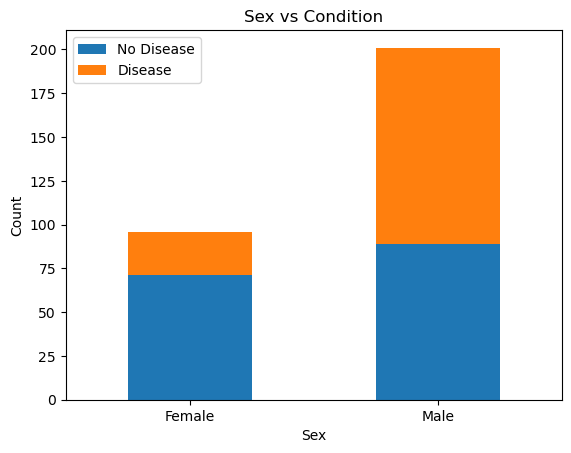

In [97]:
import pandas as pd
import matplotlib.pyplot as plt


# creates a contingency table between 'sex' and 'condition'
sex_contingency = pd.crosstab(df.sex, df.condition)

# plots the contingency table using a bar plot
ax = sex_contingency.plot(kind='bar', stacked=True)  # Stacked for multiple bars per category
plt.title('Sex vs Condition')
plt.xlabel('Sex')
plt.ylabel('Count')

ax.set_xticklabels(['Female', 'Male'], rotation=0)

plt.legend(["No Disease", "Disease"])
plt.show()


Now lets find out the percentage of each gender with or without heart disease

In [124]:
# creates variables for males and females in the dataset

males = df[df.sex == 1]
females = df[df.sex == 0]

# creates variables to find percentage of each gender with heart disease

perc_hr_men = np.sum(males.condition)/len(males.condition) * 100
print(f"Percentage of men who have heart disease: {round(perc_hr_men, 2)}%")
perc_hr_women = np.sum(females.condition)/len(females.condition) * 100
print(f"Percentage of women who have heart disease: {round(perc_hr_women, 2)}%")


Percentage of men who have heart disease: 55.72%
Percentage of women who have heart disease: 26.04%


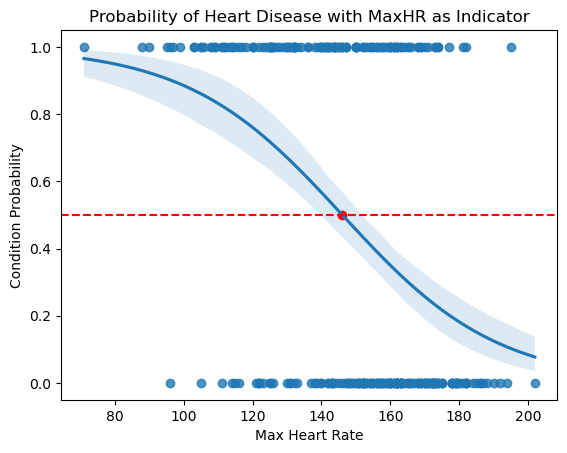

In [144]:
sns.regplot(data = df, x = "thalach", y = "condition", logistic = True)
plt.axhline(y = 0.5, color = "r", linestyle = "--")
plt.scatter(x=146, y=0.5, marker='o', color='red', label='New Point')
plt.title("Probability of Heart Disease with MaxHR as Indicator")
plt.ylabel("Condition Probability")
plt.xlabel("Max Heart Rate")
plt.show()

If a subject has a Max Heart Rate below 146, there is a 50% chance or higher of them having a heart condition. If their heart rate is above 146, there is a 50% chance or lower of having a heart condition.

#
## Other Considerations:
- We see that there is a much higher likelyhood of having a heart condition as a man when compared to women
- Other factors not used in the model such as cholesterol, resting blood pressure, and exercise induced angina can play a role in detecting heart disease